# **Exercício 3 - MLP**

Renan Hideo Watanabe NUSP.: 4777842

Sophia Celine Rafael Alves Pereira NUSP.: 11803994

# Importações e definições

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Funções dadas no enunciado:
$$a. f(x) = \frac{1}{x}, \ 1 \leq x \leq 100$$
$$b. f(x) = \log_{10}{x}, \ 1 \leq x \leq 10$$
$$c. f(x) = \exp(-x), \ 1 \leq x \leq 10$$
$$d. f(x) = \sin(x), \ 0 \leq x \leq \frac{\pi}{2}$$

In [2]:
fa = lambda x: 1/x
fb = lambda x: np.log10(x)
fc = lambda x: np.exp(-x)
fd = lambda x: np.sin(x)

# Geração dos conjuntos de treinamento

In [3]:
def gera_dados(min, max, n_pontos):
  x = np.random.random(n_pontos).cumsum() # Gera um array de números aleatórios uniformemente distribuídos e aplica a soma cumulativa.
  x = (x - x.min()) / x.ptp() # Normaliza os valores de 'x' para que eles fiquem entre 0 e 1, subtraindo o menor valor de 'x' de todos os elementos (x - x.min()) e dividindo pelo range (peak to peak, máximo - mínimo) dos valores de 'x' (x.ptp()).
  return (max - min) * x + min # Escala os valores normalizados para o intervalo [min, max], gerando um vetor crescente com "n_pontos" números aleatórios entre min e max


Conjunto de pontos do intervalo $\ 1 \leq x \leq 100$ :

In [4]:
treino_1_100 = gera_dados(1, 100, 5500)
teste_1_100 = gera_dados(1, 100, 1000)

Conjunto de pontos do intervalo $\ 1 \leq x \leq 10$ :

In [5]:
treino_1_10 = gera_dados(1, 10, 5500)
teste_1_10 = gera_dados(1, 10, 1000)

Conjunto de pontos do intervalo $\ 0 \leq x \leq \frac{\pi}{2}$ :

In [6]:
treino_0_pi_2 = gera_dados(1, np.pi/2, 5500)
teste_0_pi_2 = gera_dados(1, np.pi/2, 1000)

Aplicação das funções com os conjuntos gerados:

In [24]:
fa_treino = np.array([treino_1_100, fa(treino_1_100)]).T
fa_teste = np.array([teste_1_100, fa(teste_1_100)]).T

fb_treino = np.array([treino_1_10, fb(treino_1_10)]).T
fb_teste = np.array([teste_1_10, fb(teste_1_10)]).T

fc_treino = np.array([treino_1_10, fc(treino_1_10)]).T
fc_teste = np.array([teste_1_10, fc(teste_1_10)]).T

fd_treino = np.array([treino_0_pi_2, fd(treino_0_pi_2)]).T
fd_teste = np.array([teste_0_pi_2, fd(teste_0_pi_2)]).T

# Gráficos das funções

## $a. f(x) = \frac{1}{x}, \ 1 \leq x \leq 100$

Text(0.5, 0, 'x')

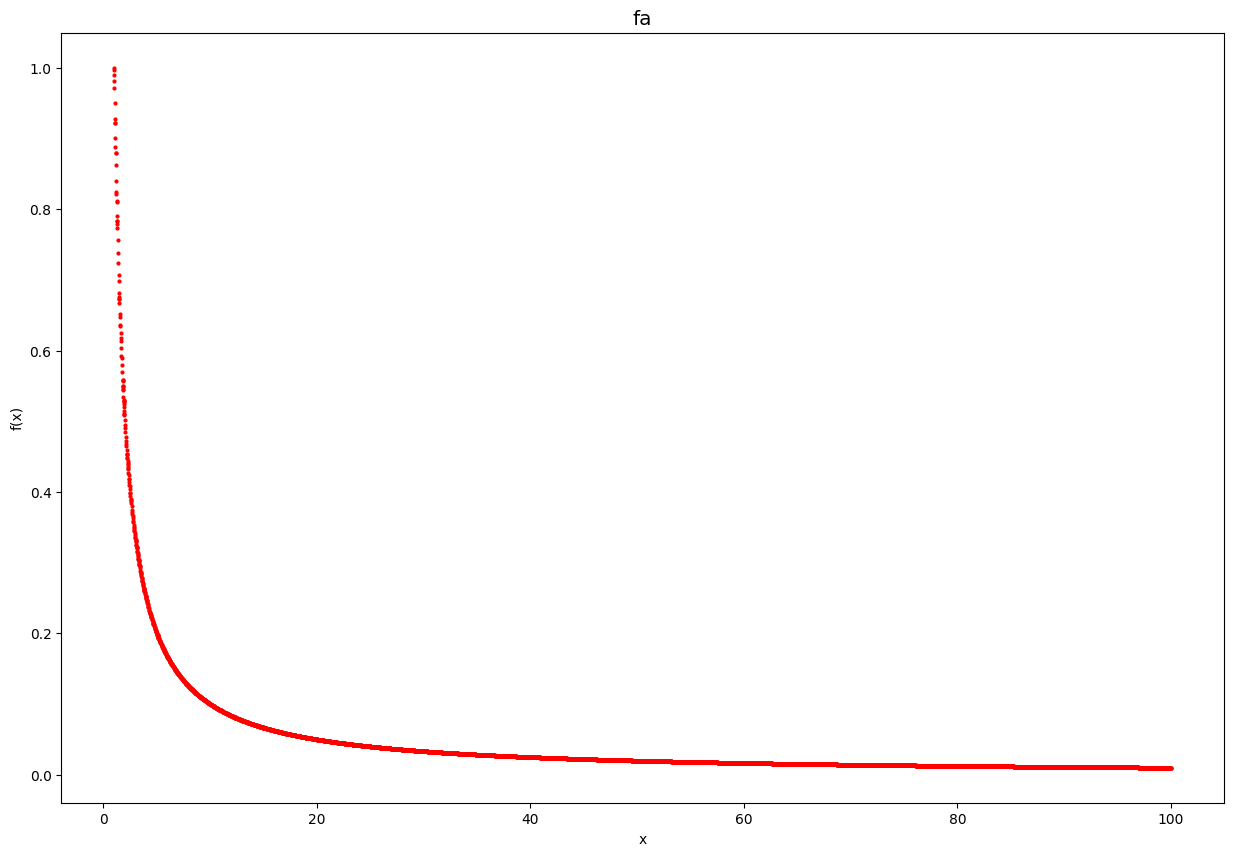

In [8]:
plt.figure(figsize=(15, 10))
plt.plot(fa_treino[:, 0], fa_treino[:, 1], 'ro', markersize=2)

plt.rcParams.update({'font.size': 12})
plt.title(r"fa")
plt.ylabel(r'f(x)')
plt.xlabel("x")

## $b. f(x) = \log_{10}{x}, \ 1 \leq x \leq 10$

Text(0.5, 0, 'x')

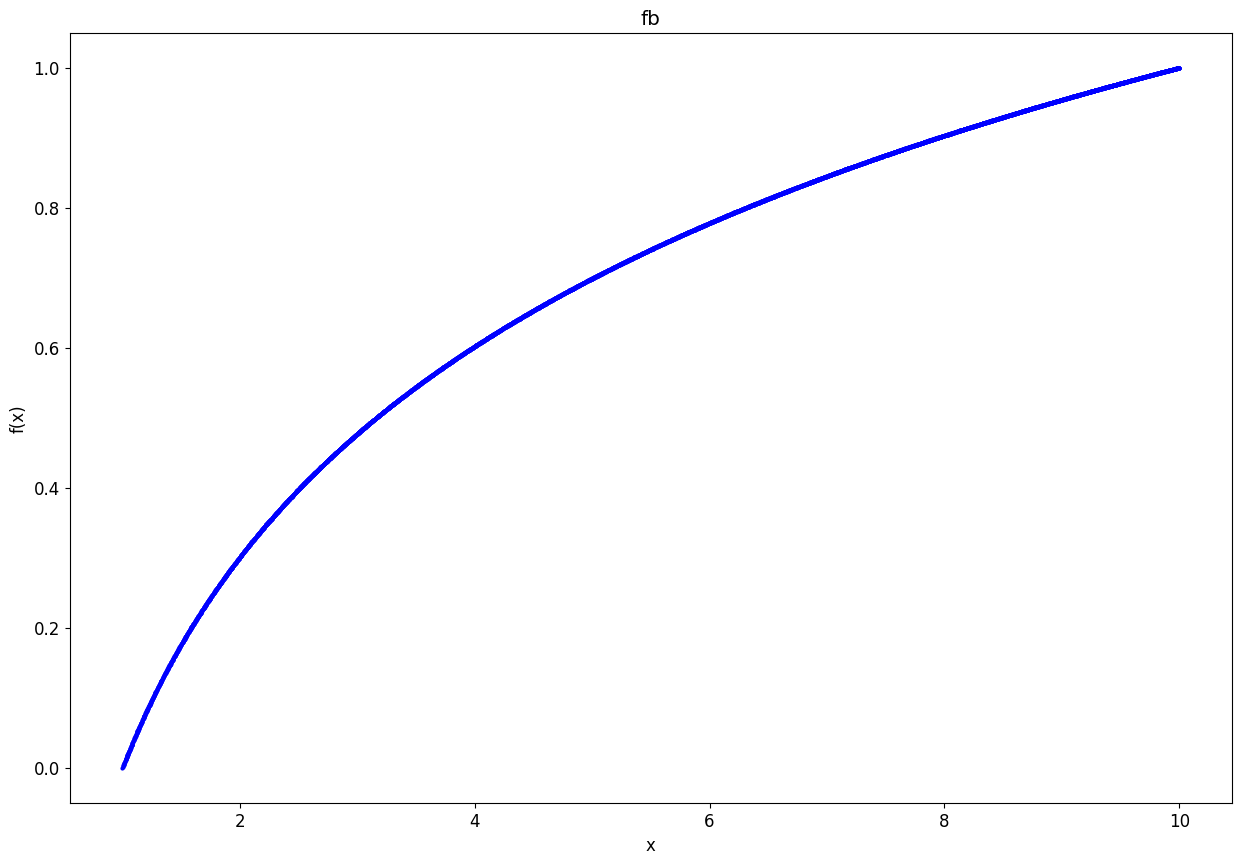

In [9]:
plt.figure(figsize=(15, 10))
plt.plot(fb_treino[:, 0], fb_treino[:, 1], 'bo', markersize=2)

plt.rcParams.update({'font.size': 12})
plt.title(r"fb")
plt.ylabel(r'f(x)')
plt.xlabel("x")

## $c. f(x) = \exp(-x), \ 1 \leq x \leq 10$

Text(0.5, 0, 'x')

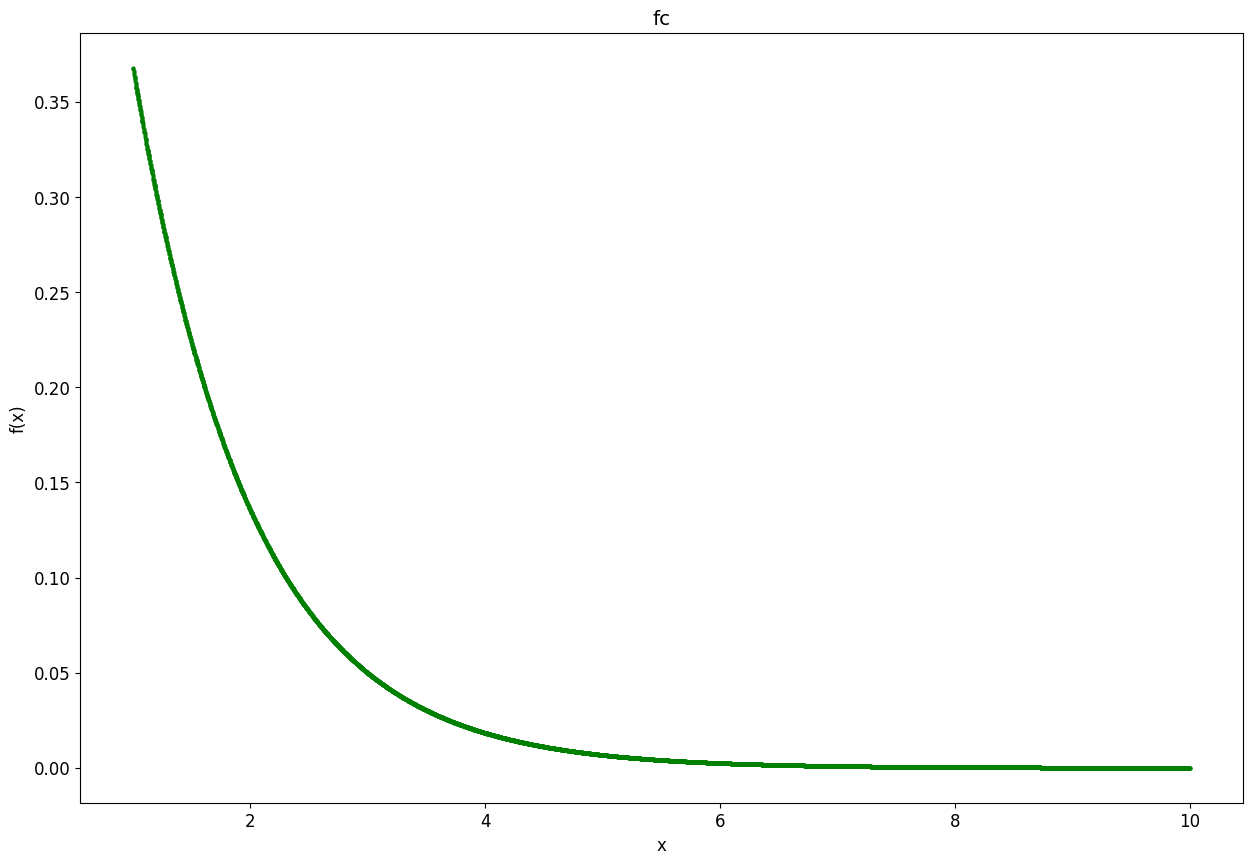

In [10]:
plt.figure(figsize=(15, 10))
plt.plot(fc_treino[:, 0], fc_treino[:, 1], 'go', markersize=2)

plt.rcParams.update({'font.size': 12})
plt.title(r"fc")
plt.ylabel(r'f(x)')
plt.xlabel("x")

## $d. f(x) = \sin(x), \ 0 \leq x \leq \frac{\pi}{2}$

Text(0.5, 0, 'x')

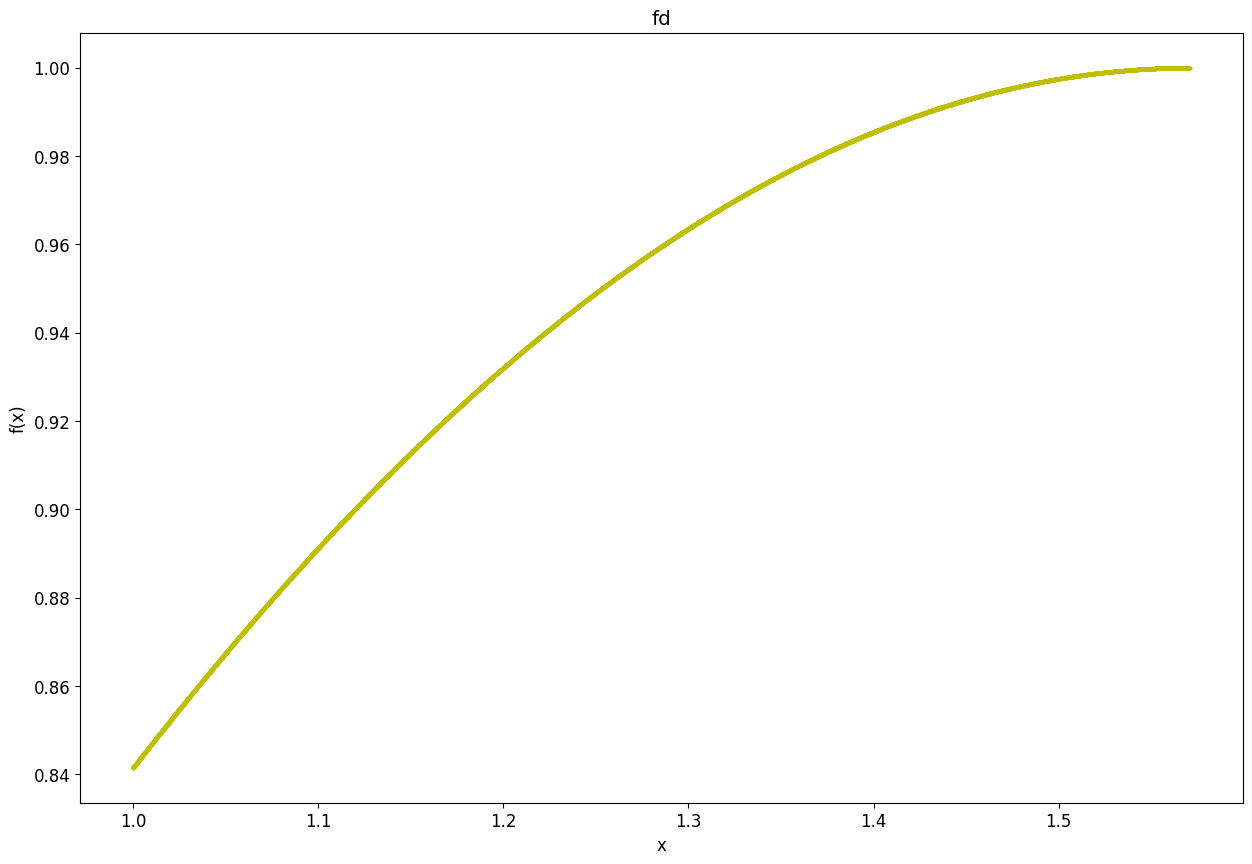

In [11]:
plt.figure(figsize=(15, 10))
plt.plot(fd_treino[:, 0], fd_treino[:, 1], 'yo', markersize=2)

plt.rcParams.update({'font.size': 12})
plt.title(r"fd")
plt.ylabel(r'f(x)')
plt.xlabel("x")

# Funções de treinamento e de inferência

In [12]:
def sigmoide(x):
    return 1/(1+np.exp(-x))

def redeMLP(x, W1, W2):
    # Função de ativação
    z = sigmoide(x @ W1)
    # Saída
    y = z @ W2
    return y, z

def treinaMLP(x, d, eta, Ne, Nn):
    """
    x: vetor de dados de treinamento
    d: sinal desejado
    eta: passo de adaptação
    Ne: número de épocas
    Nn: número de neurônios na camada oculta
    """
    Nx = x.shape[1]
    n_saidas = d.shape[1]
    W1 = 0.02 * np.random.rand(Nx, Nn + 1) - 0.01
    W2 = 0.02 * np.random.rand(Nn + 1, n_saidas) - 0.01

    J_MSE = []
    N = x.shape[0]
    Nb = 50 # Tamanho do mini-batch
    for epoca in range(Ne):
        ids = np.arange(N)
        np.random.shuffle(ids)
        x = x[ids]
        d = d[ids]

        for k in range(0, N, Nb):
            x_k = x[k:k+Nb]
            d_k = d[k:k+Nb]

            # Forward
            y, z = redeMLP(x_k, W1, W2)

            # Backward
            delta_saida = y - d_k
            delta_oculta = z * (1 - z) * np.dot(delta_saida, W2.T)

            # Atualização dos pesos
            dW2 = z.T @ delta_saida
            dW1 = (np.concatenate((x_k, np.ones((x_k.shape[0], 1))), axis=1).T @ delta_oculta)
            W2 = W2 - eta * dW2 / Nb
            W1 = W1 - eta * dW1[:-1, :] / Nb

        # Cálculo do erro médio quadrático médkio
        y, _ = redeMLP(x, W1, W2)
        J_MSE.append(np.mean((d - y)**2))

    # Mostra a função custo no final do treinamento
    print(f"Função custo final: {J_MSE[epoca]}")

    return W1, W2, J_MSE

In [13]:
def inferencia(xteste, Wcamadaoculta, Wsaida):
    # Adiciona o bias na camada de entrada
    z_in = np.concatenate((xteste.reshape(1, -1), np.ones((1, 1))), axis=1)

    # Calcula a saída da camada oculta
    z_out = z_in.T @ Wcamadaoculta
    z_out = 1 / (1 + np.exp(-z_out))

    y_in = z_out

    # Calcula a saída da rede
    y_out = y_in @ Wsaida

    return y_out

# Resultados de treinamento e teste em cada função

## $a. f(x) = \frac{1}{x}, \ 1 \leq x \leq 100$

In [28]:
xtreino_fa = np.array([fa_treino[:, 0]]).T
dtreino_fa = np.array([fa_treino[:, 1]]).T
xteste_fa = np.array([fa_teste[:, 0]]).T
dteste_fa = np.array([fa_teste[:, 1]]).T
eta = 0.1
Ne = 5000

In [29]:
print("Treinamento com 3 neurõnios na camada oculta")
W1_fa3, W2_fa3, J_MSE_fa3 = treinaMLP(xtreino_fa, dtreino_fa, eta, Ne, Nn=3)

print("Treinamento com 4 neurõnios na camada oculta")
W1_fa4, W2_fa4, J_MSE_fa4 = treinaMLP(xtreino_fa, dtreino_fa, eta, Ne, Nn=4)

print("Treinamento com 5 neurõnios na camada oculta")
W1_fa5, W2_fa5, J_MSE_fa5 = treinaMLP(xtreino_fa, dtreino_fa, eta, Ne, Nn=5)

print("Treinamento com 10 neurõnios na camada oculta")
W1_fa10, W2_fa10, J_MSE_fa10 = treinaMLP(xtreino_fa, dtreino_fa, eta, Ne, Nn=10)

print("Treinamento com 15 neurõnios na camada oculta")
W1_fa15, W2_fa15, J_MSE_fa15 = treinaMLP(xtreino_fa, dtreino_fa, eta, Ne, Nn=15)

print("Treinamento com 20 neurõnios na camada oculta")
W1_fa20, W2_fa20, J_MSE_fa20 = treinaMLP(xtreino_fa, dtreino_fa, eta, Ne, Nn=20)

print("Treinamento com 50 neurõnios na camada oculta")
W1_fa50, W2_fa50, J_MSE_fa50 = treinaMLP(xtreino_fa, dtreino_fa, eta, Ne, Nn=50)

print("Treinamento com 100 neurõnios na camada oculta")
W1_fa100, W2_fa100, J_MSE_fa100 = treinaMLP(xtreino_fa, dtreino_fa, eta, Ne, Nn=100)

Treinamento com 3 neurõnios na camada oculta
Função custo final: 1.2155651836465788e-05
Treinamento com 4 neurõnios na camada oculta
Função custo final: 1.1722059407765088e-05
Treinamento com 5 neurõnios na camada oculta
Função custo final: 9.787813771988729e-06
Treinamento com 10 neurõnios na camada oculta
Função custo final: 7.853702158644658e-06
Treinamento com 15 neurõnios na camada oculta
Função custo final: 7.649327323924832e-06
Treinamento com 20 neurõnios na camada oculta
Função custo final: 7.559592843119959e-06
Treinamento com 50 neurõnios na camada oculta
Função custo final: 7.382650469357119e-06
Treinamento com 100 neurõnios na camada oculta
Função custo final: 6.970088915826369e-06


In [30]:
# APLICAÇÃO DA FUNÇÃO DE INFERÊNCIA

yteste_fa3 = inferencia(xteste_fa, W1_fa3, W2_fa3)
yteste_fa4 = inferencia(xteste_fa, W1_fa4, W2_fa4)
yteste_fa5 = inferencia(xteste_fa, W1_fa5, W2_fa5)
yteste_fa10 = inferencia(xteste_fa, W1_fa10, W2_fa10)
yteste_fa15 = inferencia(xteste_fa, W1_fa15, W2_fa15)
yteste_fa20 = inferencia(xteste_fa, W1_fa20, W2_fa20)
yteste_fa50 = inferencia(xteste_fa, W1_fa50, W2_fa50)
yteste_fa100 = inferencia(xteste_fa, W1_fa100, W2_fa100)

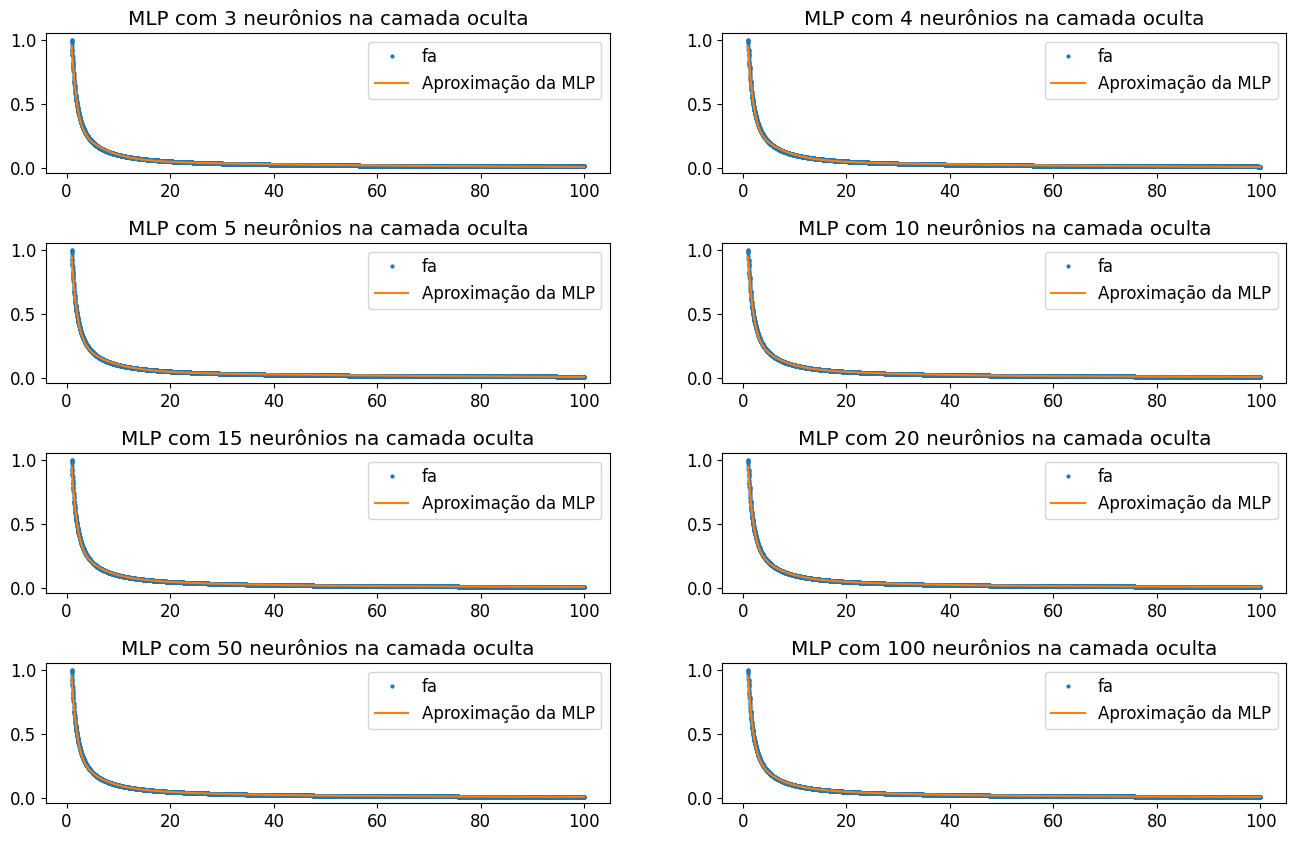

In [41]:
# GRÁFICOS DOS RESULTADOS

fig, axs = plt.subplots(4, 2, figsize=(16, 10))
axs[0, 0].plot(fa_treino[:, 0], fa_treino[:, 1], 'o', markersize=2, label='fa')
axs[0, 0].plot(xteste_fa, yteste_fa3[0:1000, 0], label='Aproximação da MLP')
axs[0, 0].set_title('MLP com 3 neurônios na camada oculta')
axs[0, 0].legend()

axs[0, 1].plot(fa_treino[:, 0], fa_treino[:, 1], 'o', markersize=2, label='fa')
axs[0, 1].plot(xteste_fa, yteste_fa4[0:1000, 0], label='Aproximação da MLP')
axs[0, 1].set_title('MLP com 4 neurônios na camada oculta')
axs[0, 1].legend()

axs[1, 0].plot(fa_treino[:, 0], fa_treino[:, 1], 'o', markersize=2, label='fa')
axs[1, 0].plot(xteste_fa, yteste_fa5[0:1000, 0], label='Aproximação da MLP')
axs[1, 0].set_title('MLP com 5 neurônios na camada oculta')
axs[1, 0].legend()

axs[1, 1].plot(fa_treino[:, 0], fa_treino[:, 1], 'o', markersize=2, label='fa')
axs[1, 1].plot(xteste_fa, yteste_fa10[0:1000, 0], label='Aproximação da MLP')
axs[1, 1].set_title('MLP com 10 neurônios na camada oculta')
axs[1, 1].legend()

axs[2, 0].plot(fa_treino[:, 0], fa_treino[:, 1], 'o', markersize=2, label='fa')
axs[2, 0].plot(xteste_fa, yteste_fa15[0:1000, 0], label='Aproximação da MLP')
axs[2, 0].set_title('MLP com 15 neurônios na camada oculta')
axs[2, 0].legend()

axs[2, 1].plot(fa_treino[:, 0], fa_treino[:, 1], 'o', markersize=2, label='fa')
axs[2, 1].plot(xteste_fa, yteste_fa20[0:1000, 0], label='Aproximação da MLP')
axs[2, 1].set_title('MLP com 20 neurônios na camada oculta')
axs[2, 1].legend()

axs[3, 0].plot(fa_treino[:, 0], fa_treino[:, 1], 'o', markersize=2, label='fa')
axs[3, 0].plot(xteste_fa, yteste_fa50[0:1000, 0], label='Aproximação da MLP')
axs[3, 0].set_title('MLP com 50 neurônios na camada oculta')
axs[3, 0].legend()

axs[3, 1].plot(fa_treino[:, 0], fa_treino[:, 1], 'o', markersize=2, label='fa')
axs[3, 1].plot(xteste_fa, yteste_fa100[0:1000, 0], label='Aproximação da MLP')
axs[3, 1].set_title('MLP com 100 neurônios na camada oculta')
axs[3, 1].legend()

plt.subplots_adjust(hspace=0.5)

In [45]:
# CÁLCULO DO ERRO QUADRÁTICO MÉDIO

erro_fa3 =  np.array([fa(xteste_fa)]).T - yteste_fa3[0:1000]
erromedio_fa3 = np.sum(((erro_fa3)**2) / len(erro_fa3))
print("Erro médio nos dados de teste do MLP com 3 neurônios na camada oculta: " + str(erromedio_fa3))

erro_fa4 =  np.array([fa(xteste_fa)]).T - yteste_fa4[0:1000]
erromedio_fa4 = np.sum(((erro_fa4)**2) / len(erro_fa4))
print("Erro médio nos dados de teste do MLP com 4 neurônios na camada oculta: " + str(erromedio_fa4))

erro_fa5 =  np.array([fa(xteste_fa)]).T - yteste_fa5[0:1000]
erromedio_fa5 = np.sum(((erro_fa5)**2) / len(erro_fa5))
print("Erro médio nos dados de teste do MLP com 5 neurônios na camada oculta: " + str(erromedio_fa5))

erro_fa10 =  np.array([fa(xteste_fa)]).T - yteste_fa10[0:1000]
erromedio_fa10 = np.sum(((erro_fa10)**2) / len(erro_fa10))
print("Erro médio nos dados de teste do MLP com 10 neurônios na camada oculta: " + str(erromedio_fa10))

erro_fa15 =  np.array([fa(xteste_fa)]).T - yteste_fa15[0:1000]
erromedio_fa15 = np.sum(((erro_fa15)**2) / len(erro_fa15))
print("Erro médio nos dados de teste do MLP com 15 neurônios na camada oculta: " + str(erromedio_fa15))

erro_fa20 =  np.array([fa(xteste_fa)]).T - yteste_fa20[0:1000]
erromedio_fa20 = np.sum(((erro_fa20)**2) / len(erro_fa20))
print("Erro médio nos dados de teste do MLP com 20 neurônios na camada oculta: " + str(erromedio_fa20))

erro_fa50 =  np.array([fa(xteste_fa)]).T - yteste_fa50[0:1000]
erromedio_fa50 = np.sum(((erro_fa50)**2) / len(erro_fa50))
print("Erro médio nos dados de teste do MLP com 50 neurônios na camada oculta: " + str(erromedio_fa50))

erro_fa100 =  np.array([fa(xteste_fa)]).T - yteste_fa100[0:1000]
erromedio_fa100 = np.sum(((erro_fa100)**2) / len(erro_fa100))
print("Erro médio nos dados de teste do MLP com 100 neurônios na camada oculta: " + str(erromedio_fa100))

Erro médio nos dados de teste do MLP com 3 neurônios na camada oculta: 0.014962313398330564
Erro médio nos dados de teste do MLP com 4 neurônios na camada oculta: 0.014675231933135247
Erro médio nos dados de teste do MLP com 5 neurônios na camada oculta: 0.01288679815739778
Erro médio nos dados de teste do MLP com 10 neurônios na camada oculta: 0.011192369155160574
Erro médio nos dados de teste do MLP com 15 neurônios na camada oculta: 0.010997609918770381
Erro médio nos dados de teste do MLP com 20 neurônios na camada oculta: 0.010829805317624256
Erro médio nos dados de teste do MLP com 50 neurônios na camada oculta: 0.010611831888611215
Erro médio nos dados de teste do MLP com 100 neurônios na camada oculta: 0.010103669811036836


## $b. f(x) = \log_{10}{x}, \ 1 \leq x \leq 10$

In [42]:
xtreino_fb = np.array([fb_treino[:, 0]]).T
dtreino_fb = np.array([fb_treino[:, 1]]).T
xteste_fb = np.array([fb_teste[:, 0]]).T
dteste_fb = np.array([fb_teste[:, 1]]).T
eta = 0.1
Ne = 5000

In [43]:
print("Treinamento com 3 neurõnios na camada oculta")
W1_fb3, W2_fb3, J_MSE_fb3 = treinaMLP(xtreino_fb, dtreino_fb, eta, Ne, Nn=3)

print("Treinamento com 4 neurõnios na camada oculta")
W1_fb4, W2_fb4, J_MSE_fb4 = treinaMLP(xtreino_fb, dtreino_fb, eta, Ne, Nn=4)

print("Treinamento com 5 neurõnios na camada oculta")
W1_fb5, W2_fb5, J_MSE_fb5 = treinaMLP(xtreino_fb, dtreino_fb, eta, Ne, Nn=5)

print("Treinamento com 10 neurõnios na camada oculta")
W1_fb10, W2_fb10, J_MSE_fb10 = treinaMLP(xtreino_fb, dtreino_fb, eta, Ne, Nn=10)

print("Treinamento com 15 neurõnios na camada oculta")
W1_fb15, W2_fb15, J_MSE_fb15 = treinaMLP(xtreino_fb, dtreino_fb, eta, Ne, Nn=15)

print("Treinamento com 20 neurõnios na camada oculta")
W1_fb20, W2_fb20, J_MSE_fb20 = treinaMLP(xtreino_fb, dtreino_fb, eta, Ne, Nn=20)

print("Treinamento com 50 neurõnios na camada oculta")
W1_fb50, W2_fb50, J_MSE_fb50 = treinaMLP(xtreino_fb, dtreino_fb, eta, Ne, Nn=50)

print("Treinamento com 100 neurõnios na camada oculta")
W1_fb100, W2_fb100, J_MSE_fb100 = treinaMLP(xtreino_fb, dtreino_fb, eta, Ne, Nn=100)

Treinamento com 3 neurõnios na camada oculta
Função custo final: 0.025947622091045088
Treinamento com 4 neurõnios na camada oculta
Função custo final: 0.02595374648830427
Treinamento com 5 neurõnios na camada oculta
Função custo final: 0.025948602411530724
Treinamento com 10 neurõnios na camada oculta
Função custo final: 0.00018244356125865022
Treinamento com 15 neurõnios na camada oculta
Função custo final: 9.188481272406506e-07
Treinamento com 20 neurõnios na camada oculta
Função custo final: 1.6460277816537136e-06
Treinamento com 50 neurõnios na camada oculta
Função custo final: 1.2255860358707484e-06
Treinamento com 100 neurõnios na camada oculta
Função custo final: 1.2587725408951328e-06


In [46]:
# APLICAÇÃO DA FUNÇÃO DE INFERÊNCIA

yteste_fb3 = inferencia(xteste_fb, W1_fb3, W2_fb3)
yteste_fb4 = inferencia(xteste_fb, W1_fb4, W2_fb4)
yteste_fb5 = inferencia(xteste_fb, W1_fb5, W2_fb5)
yteste_fb10 = inferencia(xteste_fb, W1_fb10, W2_fb10)
yteste_fb15 = inferencia(xteste_fb, W1_fb15, W2_fb15)
yteste_fb20 = inferencia(xteste_fb, W1_fb20, W2_fb20)
yteste_fb50 = inferencia(xteste_fb, W1_fb50, W2_fb50)
yteste_fb100 = inferencia(xteste_fb, W1_fb100, W2_fb100)

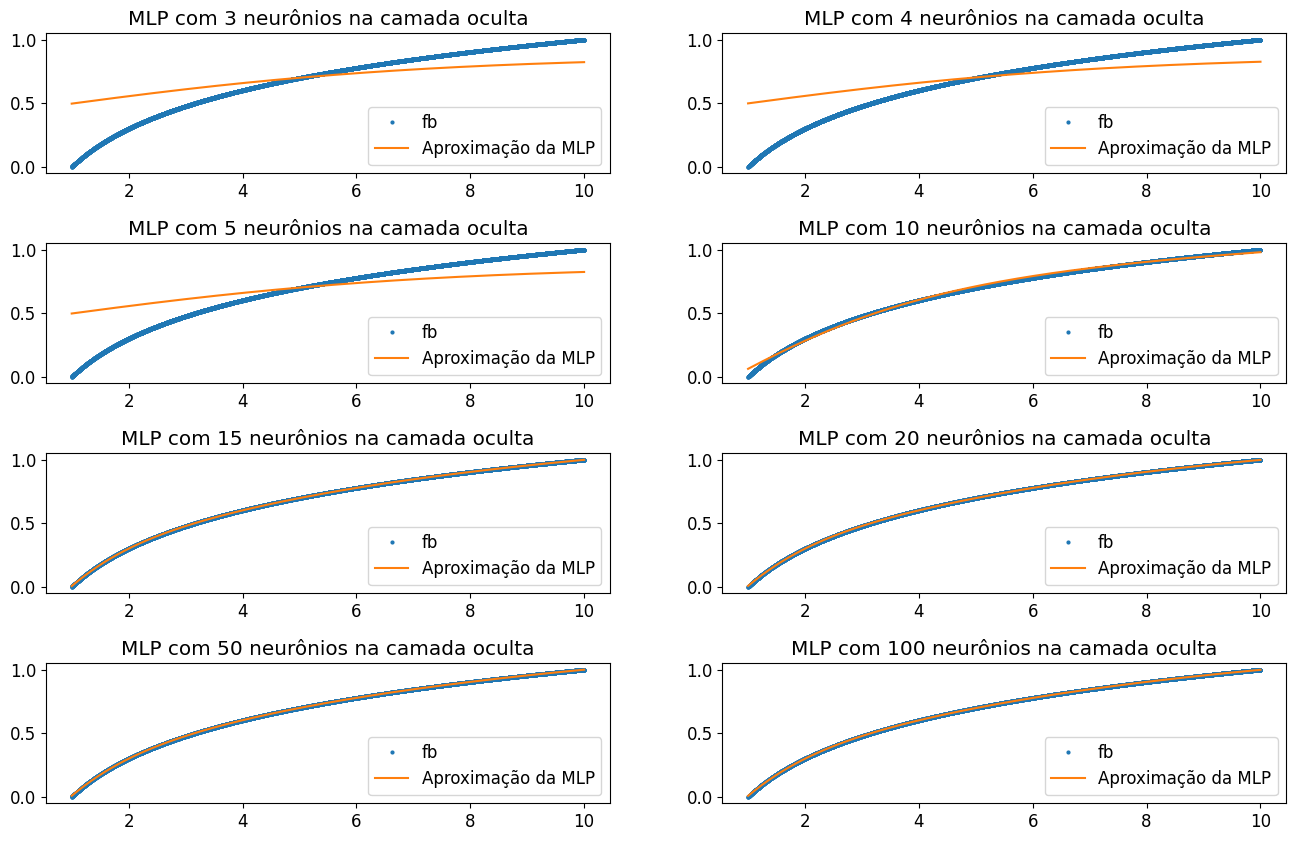

In [47]:
# GRÁFICOS DOS RESULTADOS

fig, axs = plt.subplots(4, 2, figsize=(16, 10))
axs[0, 0].plot(fb_treino[:, 0], fb_treino[:, 1], 'o', markersize=2, label='fb')
axs[0, 0].plot(xteste_fb, yteste_fb3[0:1000, 0], label='Aproximação da MLP')
axs[0, 0].set_title('MLP com 3 neurônios na camada oculta')
axs[0, 0].legend()

axs[0, 1].plot(fb_treino[:, 0], fb_treino[:, 1], 'o', markersize=2, label='fb')
axs[0, 1].plot(xteste_fb, yteste_fb4[0:1000, 0], label='Aproximação da MLP')
axs[0, 1].set_title('MLP com 4 neurônios na camada oculta')
axs[0, 1].legend()

axs[1, 0].plot(fb_treino[:, 0], fb_treino[:, 1], 'o', markersize=2, label='fb')
axs[1, 0].plot(xteste_fb, yteste_fb5[0:1000, 0], label='Aproximação da MLP')
axs[1, 0].set_title('MLP com 5 neurônios na camada oculta')
axs[1, 0].legend()

axs[1, 1].plot(fb_treino[:, 0], fb_treino[:, 1], 'o', markersize=2, label='fb')
axs[1, 1].plot(xteste_fb, yteste_fb10[0:1000, 0], label='Aproximação da MLP')
axs[1, 1].set_title('MLP com 10 neurônios na camada oculta')
axs[1, 1].legend()

axs[2, 0].plot(fb_treino[:, 0], fb_treino[:, 1], 'o', markersize=2, label='fb')
axs[2, 0].plot(xteste_fb, yteste_fb15[0:1000, 0], label='Aproximação da MLP')
axs[2, 0].set_title('MLP com 15 neurônios na camada oculta')
axs[2, 0].legend()

axs[2, 1].plot(fb_treino[:, 0], fb_treino[:, 1], 'o', markersize=2, label='fb')
axs[2, 1].plot(xteste_fb, yteste_fb20[0:1000, 0], label='Aproximação da MLP')
axs[2, 1].set_title('MLP com 20 neurônios na camada oculta')
axs[2, 1].legend()

axs[3, 0].plot(fb_treino[:, 0], fb_treino[:, 1], 'o', markersize=2, label='fb')
axs[3, 0].plot(xteste_fb, yteste_fb50[0:1000, 0], label='Aproximação da MLP')
axs[3, 0].set_title('MLP com 50 neurônios na camada oculta')
axs[3, 0].legend()

axs[3, 1].plot(fb_treino[:, 0], fb_treino[:, 1], 'o', markersize=2, label='fb')
axs[3, 1].plot(xteste_fb, yteste_fb100[0:1000, 0], label='Aproximação da MLP')
axs[3, 1].set_title('MLP com 100 neurônios na camada oculta')
axs[3, 1].legend()

plt.subplots_adjust(hspace=0.5)

In [48]:
# CÁLCULO DO ERRO QUADRÁTICO MÉDIO

erro_fb3 =  np.array([fb(xteste_fb)]).T - yteste_fb3[0:1000]
erromedio_fb3 = np.sum(((erro_fb3)**2) / len(erro_fb3))
print("Erro médio nos dados de teste do MLP com 3 neurônios na camada oculta: " + str(erromedio_fb3))

erro_fb4 =  np.array([fb(xteste_fb)]).T - yteste_fb4[0:1000]
erromedio_fb4 = np.sum(((erro_fb4)**2) / len(erro_fb4))
print("Erro médio nos dados de teste do MLP com 4 neurônios na camada oculta: " + str(erromedio_fb4))

erro_fb5 =  np.array([fb(xteste_fb)]).T - yteste_fb5[0:1000]
erromedio_fb5 = np.sum(((erro_fb5)**2) / len(erro_fb5))
print("Erro médio nos dados de teste do MLP com 5 neurônios na camada oculta: " + str(erromedio_fb5))

erro_fb10 =  np.array([fb(xteste_fb)]).T - yteste_fb10[0:1000]
erromedio_fb10 = np.sum(((erro_fb10)**2) / len(erro_fb10))
print("Erro médio nos dados de teste do MLP com 10 neurônios na camada oculta: " + str(erromedio_fb10))

erro_fb15 =  np.array([fb(xteste_fb)]).T - yteste_fb15[0:1000]
erromedio_fb15 = np.sum(((erro_fb15)**2) / len(erro_fb15))
print("Erro médio nos dados de teste do MLP com 15 neurônios na camada oculta: " + str(erromedio_fb15))

erro_fb20 =  np.array([fb(xteste_fb)]).T - yteste_fb20[0:1000]
erromedio_fb20 = np.sum(((erro_fb20)**2) / len(erro_fb20))
print("Erro médio nos dados de teste do MLP com 20 neurônios na camada oculta: " + str(erromedio_fb20))

erro_fb50 =  np.array([fb(xteste_fb)]).T - yteste_fb50[0:1000]
erromedio_fb50 = np.sum(((erro_fb50)**2) / len(erro_fb50))
print("Erro médio nos dados de teste do MLP com 50 neurônios na camada oculta: " + str(erromedio_fb50))

erro_fb100 =  np.array([fb(xteste_fb)]).T - yteste_fb100[0:1000]
erromedio_fb100 = np.sum(((erro_fb100)**2) / len(erro_fb100))
print("Erro médio nos dados de teste do MLP com 100 neurônios na camada oculta: " + str(erromedio_fb100))

Erro médio nos dados de teste do MLP com 3 neurônios na camada oculta: 25.737713367295854
Erro médio nos dados de teste do MLP com 4 neurônios na camada oculta: 25.739274758405188
Erro médio nos dados de teste do MLP com 5 neurônios na camada oculta: 25.736580644406413
Erro médio nos dados de teste do MLP com 10 neurônios na camada oculta: 0.17771652891953088
Erro médio nos dados de teste do MLP com 15 neurônios na camada oculta: 0.0009280828273324608
Erro médio nos dados de teste do MLP com 20 neurônios na camada oculta: 0.0016387822046935142
Erro médio nos dados de teste do MLP com 50 neurônios na camada oculta: 0.001183322717997644
Erro médio nos dados de teste do MLP com 100 neurônios na camada oculta: 0.0012541080853809808


## $c. f(x) = \exp(-x), \ 1 \leq x \leq 10$

In [49]:
xtreino_fc = np.array([fc_treino[:, 0]]).T
dtreino_fc = np.array([fc_treino[:, 1]]).T
xteste_fc = np.array([fc_teste[:, 0]]).T
dteste_fc = np.array([fc_teste[:, 1]]).T
eta = 0.5
Ne = 5000

In [50]:
print("Treinamento com 3 neurõnios na camada oculta")
W1_fc3, W2_fc3, J_MSE_fc3 = treinaMLP(xtreino_fc, dtreino_fc, eta, Ne, Nn=3)

print("Treinamento com 4 neurõnios na camada oculta")
W1_fc4, W2_fc4, J_MSE_fc4 = treinaMLP(xtreino_fc, dtreino_fc, eta, Ne, Nn=4)

print("Treinamento com 5 neurõnios na camada oculta")
W1_fc5, W2_fc5, J_MSE_fc5 = treinaMLP(xtreino_fc, dtreino_fc, eta, Ne, Nn=5)

print("Treinamento com 10 neurõnios na camada oculta")
W1_fc10, W2_fc10, J_MSE_fc10 = treinaMLP(xtreino_fc, dtreino_fc, eta, Ne, Nn=10)

print("Treinamento com 15 neurõnios na camada oculta")
W1_fc15, W2_fc15, J_MSE_fc15 = treinaMLP(xtreino_fc, dtreino_fc, eta, Ne, Nn=15)

print("Treinamento com 20 neurõnios na camada oculta")
W1_fc20, W2_fc20, J_MSE_fc20 = treinaMLP(xtreino_fc, dtreino_fc, eta, Ne, Nn=20)

print("Treinamento com 50 neurõnios na camada oculta")
W1_fc50, W2_fc50, J_MSE_fc50 = treinaMLP(xtreino_fc, dtreino_fc, eta, Ne, Nn=50)

print("Treinamento com 100 neurõnios na camada oculta")
W1_fc100, W2_fc100, J_MSE_fc100 = treinaMLP(xtreino_fc, dtreino_fc, eta, Ne, Nn=100)

Treinamento com 3 neurõnios na camada oculta
Função custo final: 4.5354924110888585e-07
Treinamento com 4 neurõnios na camada oculta
Função custo final: 4.7321586972154157e-07
Treinamento com 5 neurõnios na camada oculta
Função custo final: 3.777712818322951e-07
Treinamento com 10 neurõnios na camada oculta
Função custo final: 1.0720159919972599e-07
Treinamento com 15 neurõnios na camada oculta
Função custo final: 3.4519979853385575e-07
Treinamento com 20 neurõnios na camada oculta
Função custo final: 1.2631627359839428e-07
Treinamento com 50 neurõnios na camada oculta
Função custo final: 4.895608897286255e-07
Treinamento com 100 neurõnios na camada oculta
Função custo final: 0.003115731893989876


In [51]:
# APLICAÇÃO DA FUNÇÃO DE INFERÊNCIA

yteste_fc3 = inferencia(xteste_fc, W1_fc3, W2_fc3)
yteste_fc4 = inferencia(xteste_fc, W1_fc4, W2_fc4)
yteste_fc5 = inferencia(xteste_fc, W1_fc5, W2_fc5)
yteste_fc10 = inferencia(xteste_fc, W1_fc10, W2_fc10)
yteste_fc15 = inferencia(xteste_fc, W1_fc15, W2_fc15)
yteste_fc20 = inferencia(xteste_fc, W1_fc20, W2_fc20)
yteste_fc50 = inferencia(xteste_fc, W1_fc50, W2_fc50)
yteste_fc100 = inferencia(xteste_fc, W1_fc100, W2_fc100)

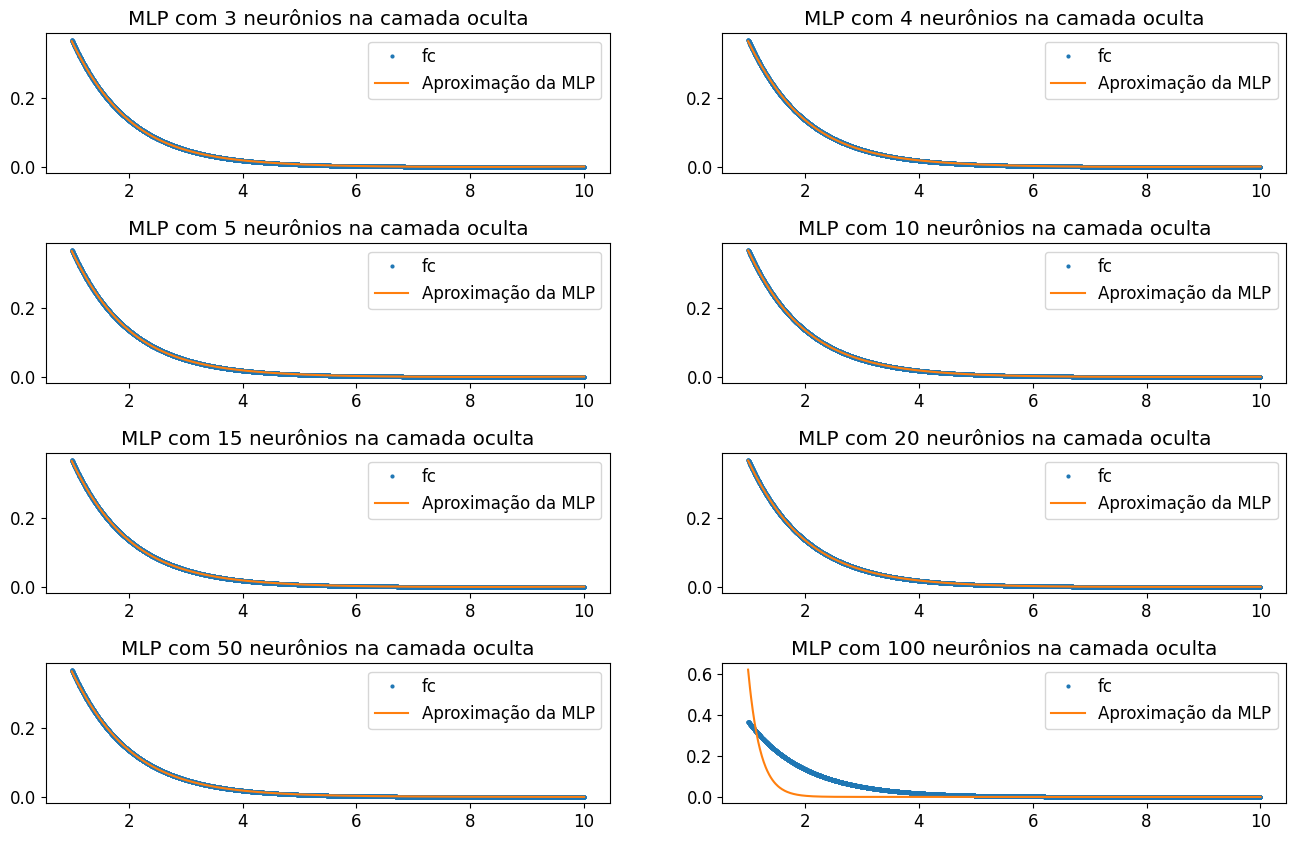

In [52]:
# GRÁFICOS DOS RESULTADOS

fig, axs = plt.subplots(4, 2, figsize=(16, 10))
axs[0, 0].plot(fc_treino[:, 0], fc_treino[:, 1], 'o', markersize=2, label='fc')
axs[0, 0].plot(xteste_fc, yteste_fc3[0:1000, 0], label='Aproximação da MLP')
axs[0, 0].set_title('MLP com 3 neurônios na camada oculta')
axs[0, 0].legend()

axs[0, 1].plot(fc_treino[:, 0], fc_treino[:, 1], 'o', markersize=2, label='fc')
axs[0, 1].plot(xteste_fc, yteste_fc4[0:1000, 0], label='Aproximação da MLP')
axs[0, 1].set_title('MLP com 4 neurônios na camada oculta')
axs[0, 1].legend()

axs[1, 0].plot(fc_treino[:, 0], fc_treino[:, 1], 'o', markersize=2, label='fc')
axs[1, 0].plot(xteste_fc, yteste_fc5[0:1000, 0], label='Aproximação da MLP')
axs[1, 0].set_title('MLP com 5 neurônios na camada oculta')
axs[1, 0].legend()

axs[1, 1].plot(fc_treino[:, 0], fc_treino[:, 1], 'o', markersize=2, label='fc')
axs[1, 1].plot(xteste_fc, yteste_fc10[0:1000, 0], label='Aproximação da MLP')
axs[1, 1].set_title('MLP com 10 neurônios na camada oculta')
axs[1, 1].legend()

axs[2, 0].plot(fc_treino[:, 0], fc_treino[:, 1], 'o', markersize=2, label='fc')
axs[2, 0].plot(xteste_fc, yteste_fc15[0:1000, 0], label='Aproximação da MLP')
axs[2, 0].set_title('MLP com 15 neurônios na camada oculta')
axs[2, 0].legend()

axs[2, 1].plot(fc_treino[:, 0], fc_treino[:, 1], 'o', markersize=2, label='fc')
axs[2, 1].plot(xteste_fc, yteste_fc20[0:1000, 0], label='Aproximação da MLP')
axs[2, 1].set_title('MLP com 20 neurônios na camada oculta')
axs[2, 1].legend()

axs[3, 0].plot(fc_treino[:, 0], fc_treino[:, 1], 'o', markersize=2, label='fc')
axs[3, 0].plot(xteste_fc, yteste_fc50[0:1000, 0], label='Aproximação da MLP')
axs[3, 0].set_title('MLP com 50 neurônios na camada oculta')
axs[3, 0].legend()

axs[3, 1].plot(fc_treino[:, 0], fc_treino[:, 1], 'o', markersize=2, label='fc')
axs[3, 1].plot(xteste_fc, yteste_fc100[0:1000, 0], label='Aproximação da MLP')
axs[3, 1].set_title('MLP com 100 neurônios na camada oculta')
axs[3, 1].legend()

plt.subplots_adjust(hspace=0.5)

In [53]:
# CÁLCULO DO ERRO QUADRÁTICO MÉDIO

erro_fc3 =  np.array([fc(xteste_fc)]).T - yteste_fc3[0:1000]
erromedio_fc3 = np.sum(((erro_fc3)**2) / len(erro_fc3))
print("Erro médio nos dados de teste do MLP com 3 neurônios na camada oculta: " + str(erromedio_fc3))

erro_fc4 =  np.array([fc(xteste_fc)]).T - yteste_fc4[0:1000]
erromedio_fc4 = np.sum(((erro_fc4)**2) / len(erro_fc4))
print("Erro médio nos dados de teste do MLP com 4 neurônios na camada oculta: " + str(erromedio_fc4))

erro_fc5 =  np.array([fc(xteste_fc)]).T - yteste_fc5[0:1000]
erromedio_fc5 = np.sum(((erro_fc5)**2) / len(erro_fc5))
print("Erro médio nos dados de teste do MLP com 5 neurônios na camada oculta: " + str(erromedio_fc5))

erro_fc10 =  np.array([fc(xteste_fc)]).T - yteste_fc10[0:1000]
erromedio_fc10 = np.sum(((erro_fc10)**2) / len(erro_fc10))
print("Erro médio nos dados de teste do MLP com 10 neurônios na camada oculta: " + str(erromedio_fc10))

erro_fc15 =  np.array([fc(xteste_fc)]).T - yteste_fc15[0:1000]
erromedio_fc15 = np.sum(((erro_fc15)**2) / len(erro_fc15))
print("Erro médio nos dados de teste do MLP com 15 neurônios na camada oculta: " + str(erromedio_fc15))

erro_fc20 =  np.array([fc(xteste_fc)]).T - yteste_fc20[0:1000]
erromedio_fc20 = np.sum(((erro_fc20)**2) / len(erro_fc20))
print("Erro médio nos dados de teste do MLP com 20 neurônios na camada oculta: " + str(erromedio_fc20))

erro_fc50 =  np.array([fc(xteste_fc)]).T - yteste_fc50[0:1000]
erromedio_fc50 = np.sum(((erro_fc50)**2) / len(erro_fc50))
print("Erro médio nos dados de teste do MLP com 50 neurônios na camada oculta: " + str(erromedio_fc50))

erro_fc100 =  np.array([fc(xteste_fc)]).T - yteste_fc100[0:1000]
erromedio_fc100 = np.sum(((erro_fc100)**2) / len(erro_fc100))
print("Erro médio nos dados de teste do MLP com 100 neurônios na camada oculta: " + str(erromedio_fc100))

Erro médio nos dados de teste do MLP com 3 neurônios na camada oculta: 0.0004548048948794286
Erro médio nos dados de teste do MLP com 4 neurônios na camada oculta: 0.0004745054072223096
Erro médio nos dados de teste do MLP com 5 neurônios na camada oculta: 0.0003784360117587436
Erro médio nos dados de teste do MLP com 10 neurônios na camada oculta: 0.0001064233830056647
Erro médio nos dados de teste do MLP com 15 neurônios na camada oculta: 0.0003474913380986916
Erro médio nos dados de teste do MLP com 20 neurônios na camada oculta: 0.00012485789574397376
Erro médio nos dados de teste do MLP com 50 neurônios na camada oculta: 0.0004914684857653109
Erro médio nos dados de teste do MLP com 100 neurônios na camada oculta: 3.1167688531735385


## $d. f(x) = \sin(x), \ 0 \leq x \leq \frac{\pi}{2}$

In [54]:
xtreino_fd = np.array([fd_treino[:, 0]]).T
dtreino_fd = np.array([fd_treino[:, 1]]).T
xteste_fd = np.array([fd_teste[:, 0]]).T
dteste_fd = np.array([fd_teste[:, 1]]).T
eta = 0.5
Ne = 5000

In [55]:
print("Treinamento com 3 neurõnios na camada oculta")
W1_fd3, W2_fd3, J_MSE_fd3 = treinaMLP(xtreino_fd, dtreino_fd, eta, Ne, Nn=3)

print("Treinamento com 4 neurõnios na camada oculta")
W1_fd4, W2_fd4, J_MSE_fd4 = treinaMLP(xtreino_fd, dtreino_fd, eta, Ne, Nn=4)

print("Treinamento com 5 neurõnios na camada oculta")
W1_fd5, W2_fd5, J_MSE_fd5 = treinaMLP(xtreino_fd, dtreino_fd, eta, Ne, Nn=5)

print("Treinamento com 10 neurõnios na camada oculta")
W1_fd10, W2_fd10, J_MSE_fd10 = treinaMLP(xtreino_fd, dtreino_fd, eta, Ne, Nn=10)

print("Treinamento com 15 neurõnios na camada oculta")
W1_fd15, W2_fd15, J_MSE_fd15 = treinaMLP(xtreino_fd, dtreino_fd, eta, Ne, Nn=15)

print("Treinamento com 20 neurõnios na camada oculta")
W1_fd20, W2_fd20, J_MSE_fd20 = treinaMLP(xtreino_fd, dtreino_fd, eta, Ne, Nn=20)

print("Treinamento com 50 neurõnios na camada oculta")
W1_fd50, W2_fd50, J_MSE_fd50 = treinaMLP(xtreino_fd, dtreino_fd, eta, Ne, Nn=50)

print("Treinamento com 100 neurõnios na camada oculta")
W1_fd100, W2_fd100, J_MSE_fd100 = treinaMLP(xtreino_fd, dtreino_fd, eta, Ne, Nn=100)

Treinamento com 3 neurõnios na camada oculta
Função custo final: 0.00024549556313087356
Treinamento com 4 neurõnios na camada oculta
Função custo final: 3.1091666932257316e-05
Treinamento com 5 neurõnios na camada oculta
Função custo final: 0.00031289239004287706
Treinamento com 10 neurõnios na camada oculta
Função custo final: 1.4994713023111954e-05
Treinamento com 15 neurõnios na camada oculta
Função custo final: 1.645017714848372e-06
Treinamento com 20 neurõnios na camada oculta
Função custo final: 9.324299697548037e-07
Treinamento com 50 neurõnios na camada oculta
Função custo final: 0.0004340059947854686
Treinamento com 100 neurõnios na camada oculta
Função custo final: 0.8979296256869354


In [56]:
# APLICAÇÃO DA FUNÇÃO DE INFERÊNCIA

yteste_fd3 = inferencia(xteste_fd, W1_fd3, W2_fd3)
yteste_fd4 = inferencia(xteste_fd, W1_fd4, W2_fd4)
yteste_fd5 = inferencia(xteste_fd, W1_fd5, W2_fd5)
yteste_fd10 = inferencia(xteste_fd, W1_fd10, W2_fd10)
yteste_fd15 = inferencia(xteste_fd, W1_fd15, W2_fd15)
yteste_fd20 = inferencia(xteste_fd, W1_fd20, W2_fd20)
yteste_fd50 = inferencia(xteste_fd, W1_fd50, W2_fd50)
yteste_fd100 = inferencia(xteste_fd, W1_fd100, W2_fd100)

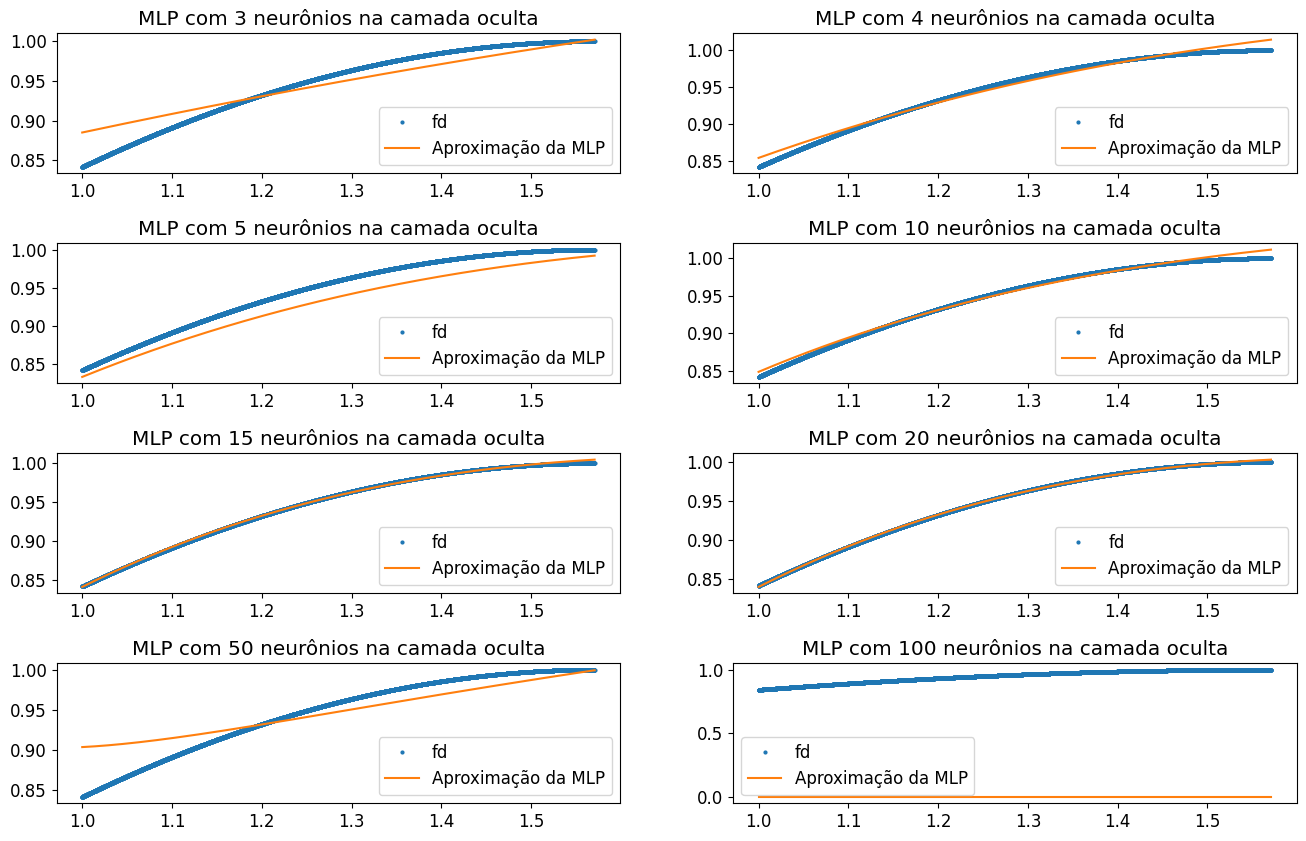

In [57]:
# GRÁFICOS DOS RESULTADOS

fig, axs = plt.subplots(4, 2, figsize=(16, 10))
axs[0, 0].plot(fd_treino[:, 0], fd_treino[:, 1], 'o', markersize=2, label='fd')
axs[0, 0].plot(xteste_fd, yteste_fd3[0:1000, 0], label='Aproximação da MLP')
axs[0, 0].set_title('MLP com 3 neurônios na camada oculta')
axs[0, 0].legend()

axs[0, 1].plot(fd_treino[:, 0], fd_treino[:, 1], 'o', markersize=2, label='fd')
axs[0, 1].plot(xteste_fd, yteste_fd4[0:1000, 0], label='Aproximação da MLP')
axs[0, 1].set_title('MLP com 4 neurônios na camada oculta')
axs[0, 1].legend()

axs[1, 0].plot(fd_treino[:, 0], fd_treino[:, 1], 'o', markersize=2, label='fd')
axs[1, 0].plot(xteste_fd, yteste_fd5[0:1000, 0], label='Aproximação da MLP')
axs[1, 0].set_title('MLP com 5 neurônios na camada oculta')
axs[1, 0].legend()

axs[1, 1].plot(fd_treino[:, 0], fd_treino[:, 1], 'o', markersize=2, label='fd')
axs[1, 1].plot(xteste_fd, yteste_fd10[0:1000, 0], label='Aproximação da MLP')
axs[1, 1].set_title('MLP com 10 neurônios na camada oculta')
axs[1, 1].legend()

axs[2, 0].plot(fd_treino[:, 0], fd_treino[:, 1], 'o', markersize=2, label='fd')
axs[2, 0].plot(xteste_fd, yteste_fd15[0:1000, 0], label='Aproximação da MLP')
axs[2, 0].set_title('MLP com 15 neurônios na camada oculta')
axs[2, 0].legend()

axs[2, 1].plot(fd_treino[:, 0], fd_treino[:, 1], 'o', markersize=2, label='fd')
axs[2, 1].plot(xteste_fd, yteste_fd20[0:1000, 0], label='Aproximação da MLP')
axs[2, 1].set_title('MLP com 20 neurônios na camada oculta')
axs[2, 1].legend()

axs[3, 0].plot(fd_treino[:, 0], fd_treino[:, 1], 'o', markersize=2, label='fd')
axs[3, 0].plot(xteste_fd, yteste_fd50[0:1000, 0], label='Aproximação da MLP')
axs[3, 0].set_title('MLP com 50 neurônios na camada oculta')
axs[3, 0].legend()

axs[3, 1].plot(fd_treino[:, 0], fd_treino[:, 1], 'o', markersize=2, label='fd')
axs[3, 1].plot(xteste_fd, yteste_fd100[0:1000, 0], label='Aproximação da MLP')
axs[3, 1].set_title('MLP com 100 neurônios na camada oculta')
axs[3, 1].legend()

plt.subplots_adjust(hspace=0.5)

In [58]:
# CÁLCULO DO ERRO QUADRÁTICO MÉDIO

erro_fd3 =  np.array([fd(xteste_fd)]).T - yteste_fd3[0:1000]
erromedio_fd3 = np.sum(((erro_fd3)**2) / len(erro_fd3))
print("Erro médio nos dados de teste do MLP com 3 neurônios na camada oculta: " + str(erromedio_fd3))

erro_fd4 =  np.array([fd(xteste_fd)]).T - yteste_fd4[0:1000]
erromedio_fd4 = np.sum(((erro_fd4)**2) / len(erro_fd4))
print("Erro médio nos dados de teste do MLP com 4 neurônios na camada oculta: " + str(erromedio_fd4))

erro_fd5 =  np.array([fd(xteste_fd)]).T - yteste_fd5[0:1000]
erromedio_fd5 = np.sum(((erro_fd5)**2) / len(erro_fd5))
print("Erro médio nos dados de teste do MLP com 5 neurônios na camada oculta: " + str(erromedio_fd5))

erro_fd10 =  np.array([fd(xteste_fd)]).T - yteste_fd10[0:1000]
erromedio_fd10 = np.sum(((erro_fd10)**2) / len(erro_fd10))
print("Erro médio nos dados de teste do MLP com 10 neurônios na camada oculta: " + str(erromedio_fd10))

erro_fd15 =  np.array([fd(xteste_fd)]).T - yteste_fd15[0:1000]
erromedio_fd15 = np.sum(((erro_fd15)**2) / len(erro_fd15))
print("Erro médio nos dados de teste do MLP com 15 neurônios na camada oculta: " + str(erromedio_fd15))

erro_fd20 =  np.array([fd(xteste_fd)]).T - yteste_fd20[0:1000]
erromedio_fd20 = np.sum(((erro_fd20)**2) / len(erro_fd20))
print("Erro médio nos dados de teste do MLP com 20 neurônios na camada oculta: " + str(erromedio_fd20))

erro_fd50 =  np.array([fd(xteste_fd)]).T - yteste_fd50[0:1000]
erromedio_fd50 = np.sum(((erro_fd50)**2) / len(erro_fd50))
print("Erro médio nos dados de teste do MLP com 50 neurônios na camada oculta: " + str(erromedio_fd50))

erro_fd100 =  np.array([fd(xteste_fd)]).T - yteste_fd100[0:1000]
erromedio_fd100 = np.sum(((erro_fd100)**2) / len(erro_fd100))
print("Erro médio nos dados de teste do MLP com 100 neurônios na camada oculta: " + str(erromedio_fd100))

Erro médio nos dados de teste do MLP com 3 neurônios na camada oculta: 0.24131331430616526
Erro médio nos dados de teste do MLP com 4 neurônios na camada oculta: 0.03173667914494782
Erro médio nos dados de teste do MLP com 5 neurônios na camada oculta: 0.3094184084520286
Erro médio nos dados de teste do MLP com 10 neurônios na camada oculta: 0.015493573809186645
Erro médio nos dados de teste do MLP com 15 neurônios na camada oculta: 0.0017184951649801287
Erro médio nos dados de teste do MLP com 20 neurônios na camada oculta: 0.0009615676097364021
Erro médio nos dados de teste do MLP com 50 neurônios na camada oculta: 0.42800054399200205
Erro médio nos dados de teste do MLP com 100 neurônios na camada oculta: 897.4775955874526
